# 7 Data Visualization
Communicate the findings with key stakeholders using plots and interactive visualizations.

In this final data science lifecyle step, we go into more detail about the fully predicted unknown dataset.
We mainly compare the map plot of the known with the unknown dataset to get a more accurate view of the different data samples of the target variable (t1). However, we also examine the intercept and slope of the unknown dataset afterwards, because we have now predicted our target variable t1 in the previous section.

## Import Libraries

In [1]:
# Basic import(s)
import pandas as pd
import numpy as np

# Visualization libraries
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Helper script(s)
from scripts.functions import get_line_equation

# Hide all warnings in ipython
import warnings
warnings.filterwarnings('ignore')

## Import Final Datasets

In [2]:
# Loading of the known.csv dataset via pandas.
known_dataset = pd.read_csv('data/featured_known.csv')

In [3]:
# Loading of the unknown.csv dataset via pandas.
final_predictions_on_unknown_dataset = pd.read_csv('data/final_predictions_on_unknown_dataset_catboost.csv')

In [4]:
known_dataset.head()

longitude  latitude    f1      f2      f3     f4      f5     f6        t1  \
0      14.25     52.17  11.0  2403.0   890.0  344.0  3.0000  497.0  120800.0   
1      14.11     52.20  15.0  5644.0  2659.0  783.0  6.7559  757.0  312000.0   
2      14.26     52.10  52.0  2084.0  1438.0  516.0  2.3087  550.0  258600.0   
3      11.47     53.09  32.0  3011.0  1287.0  525.0  5.0605  529.0  311000.0   
4      11.46     53.03  33.0  2824.0  1797.0  493.0  3.6359  523.0  135100.0   

   id  f2_div_f4  f6_div_f2  f5_cat  
0   1       6.99       0.21       2  
1   2       7.21       0.13       5  
2   3       4.04       0.26       2  
3   4       5.74       0.18       4  
4   5       5.73       0.19       3

In [5]:
final_predictions_on_unknown_dataset.head()

longitude  latitude    f1      f2      f3          f4      f5          f6  \
0      13.28     52.63  34.0  3850.0  1619.0  602.000000  5.0465  608.000000   
1      13.31     52.45  21.0  5041.0  2719.0  441.277473  3.5335  470.986642   
2      13.39     52.40  52.0  1509.0   674.0  244.000000  4.9306  225.000000   
3      13.46     52.59  42.0  1291.0  1535.0  332.000000  1.9083  345.000000   
4      13.22     52.51  27.0  4742.0  1682.0  696.000000  6.1940  775.000000   

         t1  id  f2_div_f4  f6_div_f2  f5_cat  
0  312454.0   1   6.400000       0.16       4  
1  192814.0   2   5.202722       0.09       3  
2  295730.0   3   6.180000       0.15       4  
3  135495.0   4   3.890000       0.27       2  
4  304761.0   5   6.810000       0.16       4

In [6]:
final_predictions_on_unknown_dataset.describe()

longitude    latitude          f1           f2           f3  \
count  767.000000  767.000000  767.000000   767.000000   767.000000   
mean    13.403214   52.503596   28.624511  2301.928473  1255.226337   
std      0.159312    0.072552   12.347231  1146.611171   614.088150   
min     13.050000   52.280000    2.000000    15.000000    11.000000   
25%     13.270000   52.440000   18.500000  1542.000000   830.500000   
50%     13.403214   52.500000   29.000000  2187.000000  1190.000000   
75%     13.530000   52.560000   37.000000  2914.000000  1587.000000   
max     13.860000   52.750000   52.000000  5648.000000  3060.000000   

                f4          f5           f6             t1          id  \
count   767.000000  767.000000   767.000000     767.000000  767.000000   
mean    441.277473    3.605463   470.986642  187678.778357  384.000000   
std     217.700617    1.425370   230.019469   65057.668310  221.558119   
min       2.000000    0.499900     3.000000   58890.000000    1.000000   
25%     297.500000    2.596850   311.000000  137984.500000  192.500000   
50%     410.000000    3.530200   439.000000  179804.000000  384.000000   
75%     557.000000    4.476000   599.000000  231173.000000  575.500000   
max    1088.000000    7.860100  1141.000000  392985.000000  767.000000   

        f2_div_f4   f6_div_f2      f5_cat  
count  767.000000  767.000000  767.000000  
mean     5.202722    0.203915    2.756193  
std      1.071543    0.043602    0.920756  
min      2.340000    0.090000    1.000000  
25%      4.510000    0.180000    2.000000  
50%      5.202722    0.200000    3.000000  
75%      5.865000    0.230000    3.000000  
max      8.170000    0.320000    5.000000

### Intercept And Slope
Check intercept and slope for fully predicted unknown dataset.

In [7]:
# Calculate the intercept and slope of a line between two points for known dataset.
final_predictions_on_unknown_dataset1 = [final_predictions_on_unknown_dataset.f1[1],final_predictions_on_unknown_dataset.t1[1]]
final_predictions_on_unknown_dataset2 = [final_predictions_on_unknown_dataset.f1[2],final_predictions_on_unknown_dataset.t1[2]]
slope, intercept = get_line_equation(p1=final_predictions_on_unknown_dataset1, p2=final_predictions_on_unknown_dataset2) 
print('intercept: ', intercept)
print('slope: ', slope)

intercept:  123096.70967741935
slope:  3319.8709677419356


Text(0.5, 1.0, 'Line fitted on two points versus on all of the points')

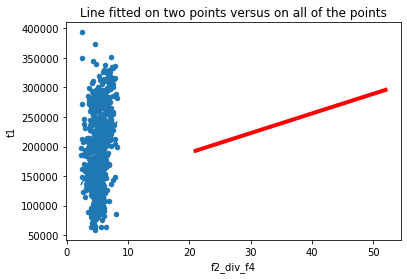

In [8]:
# Plot line fitted on two points versus on all of the points of f2_div_f4_cat from unknown dataset.
fig = final_predictions_on_unknown_dataset.plot(x='f2_div_f4', 
                y='t1', 
                kind='scatter')
# Plot the linear regression line.
plt.plot(np.unique(final_predictions_on_unknown_dataset.f2_div_f4), np.poly1d(np.polyfit(final_predictions_on_unknown_dataset.f2_div_f4, final_predictions_on_unknown_dataset.t1, 1))(np.unique(final_predictions_on_unknown_dataset.f2_div_f4)))
# Plot the line between two points.
plt.plot([final_predictions_on_unknown_dataset1[0], final_predictions_on_unknown_dataset2[0]], [final_predictions_on_unknown_dataset1[1], final_predictions_on_unknown_dataset2[1]], color="red", linewidth=4)
plt.title("Line fitted on two points versus on all of the points")

Text(0.5, 1.0, 'Line fitted on two points versus on all of the points')

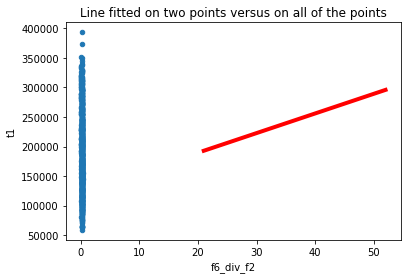

In [9]:
# Plot line fitted on two points versus on all of the points of f6_div_f2_cat from unknown dataset.
fig = final_predictions_on_unknown_dataset.plot(x='f6_div_f2', 
                y='t1', 
                kind='scatter')
# Plot the linear regression line.
plt.plot(np.unique(final_predictions_on_unknown_dataset.f6_div_f2), np.poly1d(np.polyfit(final_predictions_on_unknown_dataset.f6_div_f2, final_predictions_on_unknown_dataset.t1, 1))(np.unique(final_predictions_on_unknown_dataset.f6_div_f2)))
# Plot the line between two points.
plt.plot([final_predictions_on_unknown_dataset1[0], final_predictions_on_unknown_dataset2[0]], [final_predictions_on_unknown_dataset1[1], final_predictions_on_unknown_dataset2[1]], color="red", linewidth=4)
plt.title("Line fitted on two points versus on all of the points")

Text(0.5, 1.0, 'Line fitted on two points versus on all of the points')

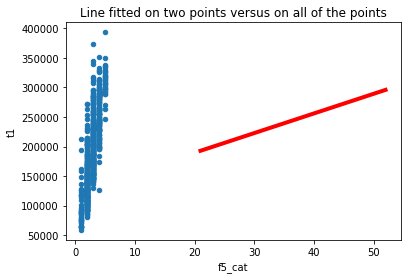

In [10]:
# Plot line fitted on two points versus on all of the points of f5_cat from unknown dataset.
fig = final_predictions_on_unknown_dataset.plot(x='f5_cat', 
                y='t1', 
                kind='scatter')
# Plot the linear regression line.
plt.plot(np.unique(final_predictions_on_unknown_dataset.f5_cat), np.poly1d(np.polyfit(final_predictions_on_unknown_dataset.f5_cat, final_predictions_on_unknown_dataset.t1, 1))(np.unique(final_predictions_on_unknown_dataset.f5_cat)))
# Plot the line between two points.
plt.plot([final_predictions_on_unknown_dataset1[0], final_predictions_on_unknown_dataset2[0]], [final_predictions_on_unknown_dataset1[1], final_predictions_on_unknown_dataset2[1]], color="red", linewidth=4)
plt.title("Line fitted on two points versus on all of the points")

Text(0.5, 1.0, 'Line fitted on two points versus on all of the points')

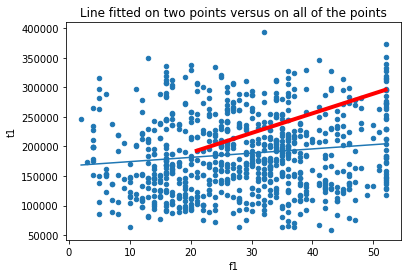

In [11]:
# Plot line fitted on two points versus on all of the points of f1 from unknown dataset.
fig = final_predictions_on_unknown_dataset.plot(x='f1', 
                y='t1', 
                kind='scatter')
# Plot the linear regression line.
plt.plot(np.unique(final_predictions_on_unknown_dataset.f1), np.poly1d(np.polyfit(final_predictions_on_unknown_dataset.f1, final_predictions_on_unknown_dataset.t1, 1))(np.unique(final_predictions_on_unknown_dataset.f1)))
# Plot the line between two points.
plt.plot([final_predictions_on_unknown_dataset1[0], final_predictions_on_unknown_dataset2[0]], [final_predictions_on_unknown_dataset1[1], final_predictions_on_unknown_dataset2[1]], color="red", linewidth=4)
plt.title("Line fitted on two points versus on all of the points")

Text(0.5, 1.0, 'Line fitted on two points versus on all of the points')

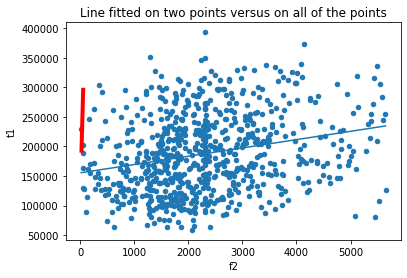

In [12]:
# Plot line fitted on two points versus on all of the points of f2 from unknown dataset.
fig = final_predictions_on_unknown_dataset.plot(x='f2', 
                y='t1', 
                kind='scatter')
# Plot the linear regression line.
plt.plot(np.unique(final_predictions_on_unknown_dataset.f2), np.poly1d(np.polyfit(final_predictions_on_unknown_dataset.f2, final_predictions_on_unknown_dataset.t1, 1))(np.unique(final_predictions_on_unknown_dataset.f2)))
# Plot the line between two points.
plt.plot([final_predictions_on_unknown_dataset1[0], final_predictions_on_unknown_dataset2[0]], [final_predictions_on_unknown_dataset1[1], final_predictions_on_unknown_dataset2[1]], color="red", linewidth=4)
plt.title("Line fitted on two points versus on all of the points")

Text(0.5, 1.0, 'Line fitted on two points versus on all of the points')

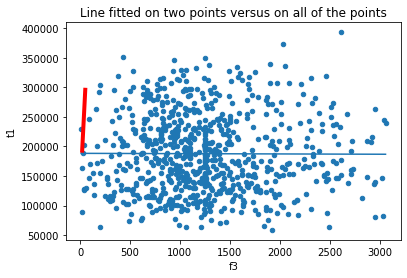

In [13]:
# Plot line fitted on two points versus on all of the points of f3 from unknown dataset.
fig = final_predictions_on_unknown_dataset.plot(x='f3', 
                y='t1', 
                kind='scatter')
# Plot the linear regression line.
plt.plot(np.unique(final_predictions_on_unknown_dataset.f3), np.poly1d(np.polyfit(final_predictions_on_unknown_dataset.f3, final_predictions_on_unknown_dataset.t1, 1))(np.unique(final_predictions_on_unknown_dataset.f3)))
# Plot the line between two points.
plt.plot([final_predictions_on_unknown_dataset1[0], final_predictions_on_unknown_dataset2[0]], [final_predictions_on_unknown_dataset1[1], final_predictions_on_unknown_dataset2[1]], color="red", linewidth=4)
plt.title("Line fitted on two points versus on all of the points")

Text(0.5, 1.0, 'Line fitted on two points versus on all of the points')

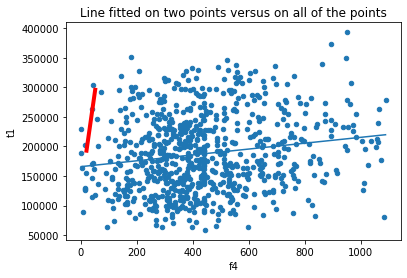

In [14]:
# Plot line fitted on two points versus on all of the points of f4 from unknown dataset.
fig = final_predictions_on_unknown_dataset.plot(x='f4', 
                y='t1', 
                kind='scatter')
# Plot the linear regression line.
plt.plot(np.unique(final_predictions_on_unknown_dataset.f4), np.poly1d(np.polyfit(final_predictions_on_unknown_dataset.f4, final_predictions_on_unknown_dataset.t1, 1))(np.unique(final_predictions_on_unknown_dataset.f4)))
# Plot the line between two points.
plt.plot([final_predictions_on_unknown_dataset1[0], final_predictions_on_unknown_dataset2[0]], [final_predictions_on_unknown_dataset1[1], final_predictions_on_unknown_dataset2[1]], color="red", linewidth=4)
plt.title("Line fitted on two points versus on all of the points")

Text(0.5, 1.0, 'Line fitted on two points versus on all of the points')

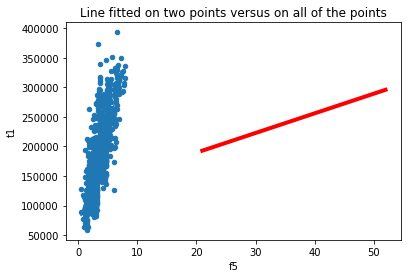

In [15]:
# Plot line fitted on two points versus on all of the points of f5 from unknown dataset.
fig = final_predictions_on_unknown_dataset.plot(x='f5', 
                y='t1', 
                kind='scatter')
# Plot the linear regression line.
plt.plot(np.unique(final_predictions_on_unknown_dataset.f5), np.poly1d(np.polyfit(final_predictions_on_unknown_dataset.f5, final_predictions_on_unknown_dataset.t1, 1))(np.unique(final_predictions_on_unknown_dataset.f5)))
# Plot the line between two points.
plt.plot([final_predictions_on_unknown_dataset1[0], final_predictions_on_unknown_dataset2[0]], [final_predictions_on_unknown_dataset1[1], final_predictions_on_unknown_dataset2[1]], color="red", linewidth=4)
plt.title("Line fitted on two points versus on all of the points")

Text(0.5, 1.0, 'Line fitted on two points versus on all of the points')

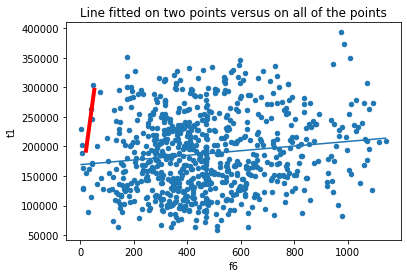

In [16]:
# Plot line fitted on two points versus on all of the points of f6 from unknown dataset.
fig = final_predictions_on_unknown_dataset.plot(x='f6', 
                y='t1', 
                kind='scatter')
# Plot the linear regression line.
plt.plot(np.unique(final_predictions_on_unknown_dataset.f6), np.poly1d(np.polyfit(final_predictions_on_unknown_dataset.f6, final_predictions_on_unknown_dataset.t1, 1))(np.unique(final_predictions_on_unknown_dataset.f6)))
# Plot the line between two points.
plt.plot([final_predictions_on_unknown_dataset1[0], final_predictions_on_unknown_dataset2[0]], [final_predictions_on_unknown_dataset1[1], final_predictions_on_unknown_dataset2[1]], color="red", linewidth=4)
plt.title("Line fitted on two points versus on all of the points")

Text(0.5, 1.0, 'Line fitted on two points versus on all of the points')

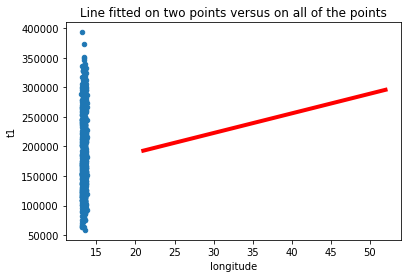

In [17]:
# Plot line fitted on two points versus on all of the points of longitude from unknown dataset.
fig = final_predictions_on_unknown_dataset.plot(x='longitude', 
                y='t1', 
                kind='scatter')
# Plot the linear regression line.
plt.plot(np.unique(final_predictions_on_unknown_dataset.longitude), np.poly1d(np.polyfit(final_predictions_on_unknown_dataset.longitude, final_predictions_on_unknown_dataset.t1, 1))(np.unique(final_predictions_on_unknown_dataset.longitude)))
# Plot the line between two points.
plt.plot([final_predictions_on_unknown_dataset1[0], final_predictions_on_unknown_dataset2[0]], [final_predictions_on_unknown_dataset1[1], final_predictions_on_unknown_dataset2[1]], color="red", linewidth=4)
plt.title("Line fitted on two points versus on all of the points")

Text(0.5, 1.0, 'Line fitted on two points versus on all of the points')

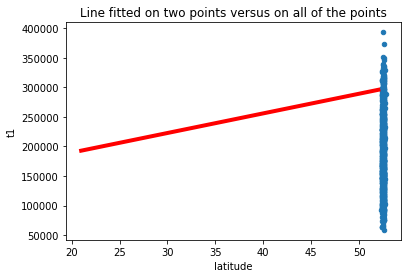

In [18]:
# Plot line fitted on two points versus on all of the points of latitude from unknown dataset.
fig = final_predictions_on_unknown_dataset.plot(x='latitude', 
                y='t1', 
                kind='scatter')
# Plot the linear regression line.
plt.plot(np.unique(final_predictions_on_unknown_dataset.latitude), np.poly1d(np.polyfit(final_predictions_on_unknown_dataset.latitude, final_predictions_on_unknown_dataset.t1, 1))(np.unique(final_predictions_on_unknown_dataset.latitude)))
# Plot the line between two points.
plt.plot([final_predictions_on_unknown_dataset1[0], final_predictions_on_unknown_dataset2[0]], [final_predictions_on_unknown_dataset1[1], final_predictions_on_unknown_dataset2[1]], color="red", linewidth=4)
plt.title("Line fitted on two points versus on all of the points")

Text(0.5, 1.0, 'Line fitted on two points versus on all of the points')

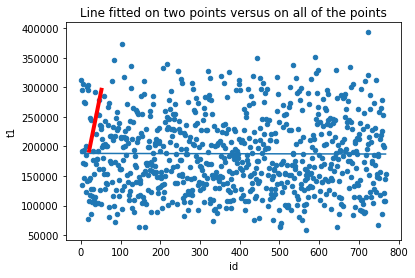

In [19]:
# Plot line fitted on two points versus on all of the points of id from unknown dataset.
fig = final_predictions_on_unknown_dataset.plot(x='id', 
                y='t1', 
                kind='scatter')
# Plot the linear regression line.
plt.plot(np.unique(final_predictions_on_unknown_dataset.id), np.poly1d(np.polyfit(final_predictions_on_unknown_dataset.id, final_predictions_on_unknown_dataset.t1, 1))(np.unique(final_predictions_on_unknown_dataset.id)))
# Plot the line between two points.
plt.plot([final_predictions_on_unknown_dataset1[0], final_predictions_on_unknown_dataset2[0]], [final_predictions_on_unknown_dataset1[1], final_predictions_on_unknown_dataset2[1]], color="red", linewidth=4)
plt.title("Line fitted on two points versus on all of the points")

### Pie Chart

In [20]:

fig = px.pie(final_predictions_on_unknown_dataset, values='t1', names='f5_cat')
fig.show()

#### Pie Chart distribution for unknown.csv
<table>
<thead>
<tr>
<th align="center">New (sub-)categories</th>
<th align="center">t1 datasamples</th>
<th align="center">percentage (%) of unknown dataset</th>
</tr>
</thead>
<tbody>
<tr>
<td align="left">f5_cat=1</td>
<td align="left">4,093,012</td>
<td align="left">2.84</td>
</tr>
<tr>
<td align="left">f5_cat=2</td>
<td align="left">40,294,294</td>
<td align="left">28</td>
</tr>
<tr>
<td align="left">f5_cat=3</td>
<td align="left">59,808,876</td>
<td align="left">41.5</td>
</tr>
<tr>
<td align="left">f5_cat=4</td>
<td align="left">29,804,394</td>
<td align="left">20.7</td>
</tr>
<tr>
<td align="left">f5_cat=5</td>
<td align="left">9,949,047</td>
<td align="left">6.91</td>
</tr>
</tbody></table>

### Map

Final comparison of the map representation with known and fully predicted unknown datasets.

#### Fully Featured And Predicted Unknown Dataset Map Plot

In [21]:
# Category 1 data samples from final predicted unknown dataset.
fig = px.scatter_mapbox(final_predictions_on_unknown_dataset.query('f5_cat == 1'),
                        lat="latitude",
                        lon="longitude",
                        hover_data=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 't1', 'id', 'f2_div_f4', 'f6_div_f2', 'f5_cat'],
                        size='f5',
                        color='f5',
                        color_continuous_scale=['blue', 'grey', 'red'],
                        color_discrete_sequence=["fuchsia"],
                        zoom=9,
                        height=800)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [22]:
# Category 2 data samples from final predicted unknown dataset.
fig = px.scatter_mapbox(final_predictions_on_unknown_dataset.query('f5_cat == 2'),
                        lat="latitude",
                        lon="longitude",
                        hover_data=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 't1', 'id', 'f2_div_f4', 'f6_div_f2', 'f5_cat'],
                        size='f5',
                        color='f5',
                        color_continuous_scale=['blue', 'grey', 'red'],
                        color_discrete_sequence=["fuchsia"],
                        zoom=9,
                        height=800)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [23]:
# Category 3 data samples from final predicted unknown dataset.
fig = px.scatter_mapbox(final_predictions_on_unknown_dataset.query('f5_cat == 3'),
                        lat="latitude",
                        lon="longitude",
                        hover_data=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 't1', 'id', 'f2_div_f4', 'f6_div_f2', 'f5_cat'],
                        size='f5',
                        color='f5',
                        color_continuous_scale=['blue', 'grey', 'red'],
                        color_discrete_sequence=["fuchsia"],
                        zoom=9,
                        height=800)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [24]:
# Category 4 data samples from final predicted unknown dataset.
fig = px.scatter_mapbox(final_predictions_on_unknown_dataset.query('f5_cat == 4'),
                        lat="latitude",
                        lon="longitude",
                        hover_data=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 't1', 'id', 'f2_div_f4', 'f6_div_f2', 'f5_cat'],
                        size='f5',
                        color='f5',
                        color_continuous_scale=['blue', 'grey', 'red'],
                        color_discrete_sequence=["fuchsia"],
                        zoom=9,
                        height=800)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [25]:
# Category 5 data samples from final predicted unknown dataset.
fig = px.scatter_mapbox(final_predictions_on_unknown_dataset.query('f5_cat == 5'),
                        lat="latitude",
                        lon="longitude",
                        hover_data=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 't1', 'id', 'f2_div_f4', 'f6_div_f2', 'f5_cat'],
                        size='f5',
                        color='f5',
                        color_continuous_scale=['blue', 'grey', 'red'],
                        color_discrete_sequence=["fuchsia"],
                        zoom=9,
                        height=800)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [26]:
fig = px.scatter_mapbox(final_predictions_on_unknown_dataset.query('f5_cat == 2'), 
lat='latitude', lon='longitude', hover_data=['f5_cat', 't1'],
                        color_discrete_sequence=['fuchsia'], zoom=9, height=800)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [27]:
fig = px.scatter_mapbox(final_predictions_on_unknown_dataset.query('f5_cat == 5'), 
lat='latitude', lon='longitude', color='f5', hover_data=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 't1', 'id'],  
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=9, height=800,
                  mapbox_style='carto-positron')
fig.show()

#### Fully Featured Known Dataset Map Plot

In [28]:
# Test check on original t1 data sample from known dataset.
known_dataset.query('t1 == 170500')

longitude  latitude    f1      f2      f3     f4      f5     f6  \
5407       12.97     52.16  14.0  2338.0  1003.0  398.0  4.2269  391.0   
7281       13.47     52.77  40.0  1010.0   488.0  157.0  3.8984  155.0   
7368       13.52     51.65  36.0  2471.0  2594.0  475.0  3.7500  498.0   
8811       13.95     51.63  36.0  2306.0  2823.0  765.0  2.0214  813.0   
10186      13.92     52.85   4.0  2171.0   928.0  461.0  4.1016  597.0   
12075      14.38     51.98  18.0  4947.0  2227.0  675.0  4.8542  714.0   
12963      12.87     52.11  33.0  1903.0  1882.0  435.0  2.4071  469.0   

             t1     id  f2_div_f4  f6_div_f2  f5_cat  
5407   170500.0   5413       5.87   0.170000       3  
7281   170500.0   7287       6.43   0.150000       3  
7368   170500.0   7374       5.20   0.200000       3  
8811   170500.0   8817       3.01   0.205033       2  
10186  170500.0  10192       4.71   0.270000       3  
12075  170500.0  12081       7.33   0.140000       4  
12963  170500.0  12969       4.37   0.250000       2

In [29]:
# Test check on original id data sample from known dataset.
known_dataset.query('id == 7287')

longitude  latitude    f1      f2     f3     f4      f5     f6  \
7281      13.47     52.77  40.0  1010.0  488.0  157.0  3.8984  155.0   

            t1    id  f2_div_f4  f6_div_f2  f5_cat  
7281  170500.0  7287       6.43       0.15       3

In [30]:
# Category 1 data samples from known dataset.
fig = px.scatter_mapbox(known_dataset.query('f5_cat == 1'),
                        lat='latitude',
                        lon='longitude',
                        hover_data=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 't1', 'id', 'f2_div_f4', 'f6_div_f2', 'f5_cat'],
                        size='t1',
                        color='f5',
                        color_continuous_scale=['blue', 'grey', 'red'],
                        color_discrete_sequence=["fuchsia"],
                        zoom=6,
                        height=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [31]:
# Category 2 data samples from known dataset.
fig = px.scatter_mapbox(known_dataset.query('f5_cat == 2'),
                        lat='latitude',
                        lon='longitude',
                        hover_data=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 't1', 'id', 'f2_div_f4', 'f6_div_f2', 'f5_cat'],
                        size='t1',
                        color='f5',
                        color_continuous_scale=['blue', 'grey', 'red'],
                        color_discrete_sequence=["fuchsia"],
                        zoom=6,
                        height=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [32]:
# Category 3 data samples from known dataset.
fig = px.scatter_mapbox(known_dataset.query('f5_cat == 3'),
                        lat='latitude',
                        lon='longitude',
                        hover_data=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 't1', 'id', 'f2_div_f4', 'f6_div_f2', 'f5_cat'],
                        size='t1',
                        color='f5',
                        color_continuous_scale=['blue', 'grey', 'red'],
                        color_discrete_sequence=["fuchsia"],
                        zoom=6,
                        height=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [33]:
# Category 4 data samples from known dataset.
fig = px.scatter_mapbox(known_dataset.query('f5_cat == 4'),
                        lat='latitude',
                        lon='longitude',
                        hover_data=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 't1', 'id', 'f2_div_f4', 'f6_div_f2', 'f5_cat'],
                        size='t1',
                        color='f5',
                        color_continuous_scale=['blue', 'grey', 'red'],
                        color_discrete_sequence=["fuchsia"],
                        zoom=6,
                        height=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [34]:
# Category 5 data samples from known dataset.
fig = px.scatter_mapbox(known_dataset.query('f5_cat == 5'),
                        lat='latitude',
                        lon='longitude',
                        hover_data=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 't1', 'id', 'f2_div_f4', 'f6_div_f2', 'f5_cat'],
                        size='t1',
                        color='f5',
                        color_continuous_scale=['blue', 'grey', 'red'],
                        color_discrete_sequence=["fuchsia"],
                        zoom=6,
                        height=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [35]:
fig = px.scatter_mapbox(known_dataset.query('f5_cat == 1'),
 lat='latitude', lon='longitude', hover_data=['f5_cat', 't1'],
                        color_discrete_sequence=["fuchsia"], zoom=6, height=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

In [36]:
fig = px.scatter_mapbox(known_dataset.query('f5_cat == 1'), lat="latitude", lon="longitude", color="f5", hover_data=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 't1', 'f2_div_f4', 'f6_div_f2', 'f5_cat', 'id'],  
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=6, height=800,
                  mapbox_style="carto-positron")
fig.show()